In [139]:
import numpy as np
import scipy.integrate as integrate
import matplotlib.pyplot as plt
% matplotlib inline

In [22]:
#Tests to see if there is a collision between two pool balls
#Input: Position vectors, velocity vectors, timestep dt
#Output: True or False
R = 2
def collision_detection_bb(r1,r2,v1,v2,dt):
    r1_f = r1 + v1*dt
    r2_f = r2 + v2*dt
    
    r_f = np.abs(r1_f - r2_f)
    r = np.sqrt(np.dot(r_f,r_f))
    
    if r < 2*R:
        return True
    else:
        return False


#Tests to see if there is a pool ball and wall collision
#Input: Position vectors, velocity vectors, timestep dt
#Output: True or False
#cd = collision detection
def cd_b_side(x,vx,dt):
    Table_x = 4
    xf = x + vx*dt
     
    if xf < R:
        return True
    elif Table_x - xf < R:
        return True
    else:
        return False
def cd_b_back_front(y,vy,dt):
    Table_y = 10
    yf = y + vy*dt
    if yf < R:
        return True
    elif Table_y - yf < R:
        return True

Excess work done on this call (perhaps wrong Dfun type).
Run with full_output = 1 to get quantitative information.
Excess accuracy requested (tolerances too small).
Run with full_output = 1 to get quantitative information.


C:\Users\Armand Salimnejad\Anaconda\lib\site-packages\ipykernel\__main__.py:37: RuntimeWarning: divide by zero encountered in divide
C:\Users\Armand Salimnejad\Anaconda\lib\site-packages\ipykernel\__main__.py:37: RuntimeWarning: invalid value encountered in divide


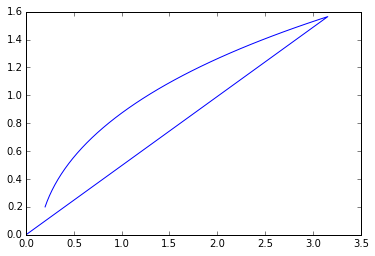

In [134]:
R = .1
g = 9.8
muSlip = .7
x0 = .2
y0 = .2
vx0 = 1.
vy0 = 2.
wx0 = 0
wy0 = 200
wz0 = 0
Table_x = 4
Table_y = 10

#                               0  1  2   3   4   5   6
initBilliardsArray = np.array([x0,y0,vx0,vy0,wx0,wy0,wz0])


def BilliardsODEModel(ball,t):
    
    x = ball[0]
    y = ball[1]
    vx = ball[2]
    vy = ball[3]
    wx = ball[4]
    wy = ball[5]
    wz = ball[6]
    
    #we're gonna need some vectors
    xhat = np.array([1,0,0])
    yhat = np.array([0,1,0])
    zhat = np.array([0,0,1])
    v = np.array([vx,vy,0])
    w = np.array([wx,wy,wz])
    
    #sliding velocity (any component of the velocity that isn't countered by the roll of the ball)
    u = v + R*np.cross(zhat,w)
    uhat = u/np.sqrt(np.dot(u,u))
    
    #when slipping
    dvSlip = -muSlip*g*uhat
    dwSlip = np.cross(zhat,uhat)*g*muSlip*5/(2*R)
    
    
    
    dx = vx
    dy = vy
    dvx = dvSlip[0]
    dvy = dvSlip[1]
    dwx = dwSlip[0]
    dwy = dwSlip[1]
    dwz = dwSlip[2]
    
    return np.array([dx,dy,dvx,dvy,dwx,dwy,dwz])

t = np.linspace(0,2,101)
dt = t[1] - t[0]

MainBilliardsArray = np.zeros(shape = (1000,7))
MBL = 0

      
    
billiardsArray = integrate.odeint(BilliardsODEModel,initBilliardsArray,t)

plt.plot(billiardsArray[:,0],billiardsArray[:,1])

newBilliardsInits = np.array([0,0,0,0,0,0,0])
for i in range(0,len(billiardsArray)):
    MainBilliardsArray[MBL] = billiardsArray[i]
    MBL += 1    
    if cd_b_side(billiardsArray[i,0],billiardsArray[i,2],dt):
        newBilliardsInits = billiardsArray[i]
        newBilliardsInits[2] = -billiardsArray[i,2]
        break
    elif cd_b_back_front(billiardsArray[i,1],billiardsArray[i,3],dt):
        newBilliardsInits = billiardsArray[i]
        newBilliardsInits[3] = -billiardsArray[i,3]
        break
    else:
        newBilliardsInits = billiardsArray[i]    
    
billiardsArray = integrate.odeint(BilliardsODEModel,newBilliardsInits,t)

#plt.plot(MainBilliardsArray[:,0],MainBilliardsArray[:,1])
#plt.plot(billiardsArray[:,0],billiardsArray[:,1])


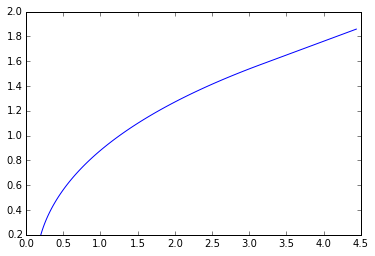

In [144]:
R = .1
g = 9.8
muSlip = .7
x0 = .2
y0 = .2
vx0 = 1.
vy0 = 2.
wx0 = 0
wy0 = 200
wz0 = 0
Table_x = 4
Table_y = 10

#                               0  1  2   3   4   5   6
initBilliardsArray = np.array([x0,y0,vx0,vy0,wx0,wy0,wz0])

def pool_solver(init, t):
    
  
    
    dt = t[1]-t[0]
    b = np.zeros(shape = (len(t),7))
    b[0] = init
    
    for i in range(1, len(t)):
        x = b[i-1,0]
        y = b[i-1,1]
        vx = b[i-1,2]
        vy = b[i-1,3]
        wx = b[i-1,4]
        wy = b[i-1,5]
        wz = b[i-1,6]
        
         #we're gonna need some vectors
        xhat = np.array([1,0,0])
        yhat = np.array([0,1,0])
        zhat = np.array([0,0,1])
        v = np.array([vx,vy,0])
        w = np.array([wx,wy,wz])
    
        #sliding velocity (any component of the velocity that isn't countered by the roll of the ball)
        u = v + R*np.cross(zhat,w)
        uhat = u/np.sqrt(np.dot(u,u))
    
        #when slipping
        dvSlip = -muSlip*g*uhat
        dwSlip = np.cross(zhat,uhat)*g*muSlip*5/(2*R)
        
        dx = vx
        dy = vy
        dvx = dvSlip[0]
        dvy = dvSlip[1]
        dwx = dwSlip[0]
        dwy = dwSlip[1]
        dwz = dwSlip[2]
        
        b[i,0] = x + dt*dx
        b[i,1] = y + dt*dy
        b[i,2] = vx + dt*dvx
        b[i,3] = vy + dt*dvy
        b[i,4] = wx + dt*dwx
        b[i,5] = wy + dt*dwy
        b[i,6] = wz + dt*dwz
        
    return b
        
t = np.linspace(0,1,101)

pool = pool_solver(initBilliardsArray,t)

plt.plot(pool[:,0],pool[:,1])